# Telcom Customer Churn Dataset
### Telecom customer churn with demographics, contracts, billing


# Objective

The objective of this analysis is to identify customer churn patterns, key retention drivers, and customer lifetime trends using historical customer data.
The goal is to provide data-backed insights and actionable strategies that help reduce customer loss and improve long-term customer value.

# Dataset Overview

Rows: 7,043 customers

Columns: 21 features

Target Variable: Churn (Yes / No)

### The dataset includes:

Demographics (Gender, SeniorCitizen, Partner, Dependents)

Subscription details (Contract type, Internet service, Add-on services)

Billing information (MonthlyCharges, TotalCharges, PaymentMethod)

Customer tenure (months with the company)

## Key Metrics Defined

Churn Rate (%)

Churn by Contract Type

Churn by Tenure Group

Service-Level Churn Rates

Customer Lifetime Trend (Tenure-based proxy)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("Data/Telco_Cusomer_Churn.csv")

In [32]:
# few show data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
## Check Duplicate values
df.duplicated().sum()

0

In [35]:
## Check missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
keep_cols = [
    "customerID","Churn","tenure","Contract",
    "MonthlyCharges","TotalCharges","PaymentMethod",
    "PaperlessBilling","InternetService","OnlineSecurity",
    "TechSupport","DeviceProtection","OnlineBackup",
    "SeniorCitizen","Partner","Dependents"
]

In [37]:
df = df[keep_cols]

In [38]:
df.head()

,customerID,Churn,tenure,Contract,MonthlyCharges,TotalCharges,PaymentMethod,PaperlessBilling,InternetService,OnlineSecurity,TechSupport,DeviceProtection,OnlineBackup,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,No,1,Month-to-month,29.85,29.85,Electronic check,Yes,DSL,No,No,No,Yes,0,Yes,No
1,5575-GNVDE,No,34,One year,56.95,1889.5,Mailed check,No,DSL,Yes,No,Yes,No,0,No,No
2,3668-QPYBK,Yes,2,Month-to-month,53.85,108.15,Mailed check,Yes,DSL,Yes,No,No,Yes,0,No,No
3,7795-CFOCW,No,45,One year,42.30,1840.75,Bank transfer (automatic),No,DSL,Yes,Yes,Yes,No,0,No,No
4,9237-HQITU,Yes,2,Month-to-month,70.70,151.65,Electronic check,Yes,Fiber optic,No,No,No,No,0,No,No


In [39]:
df.shape

(7043, 16)

In [40]:
df.columns = df.columns.str.strip().str.lower()

In [41]:
df.head()

,customerid,churn,tenure,contract,monthlycharges,totalcharges,paymentmethod,paperlessbilling,internetservice,onlinesecurity,techsupport,deviceprotection,onlinebackup,seniorcitizen,partner,dependents
0,7590-VHVEG,No,1,Month-to-month,29.85,29.85,Electronic check,Yes,DSL,No,No,No,Yes,0,Yes,No
1,5575-GNVDE,No,34,One year,56.95,1889.5,Mailed check,No,DSL,Yes,No,Yes,No,0,No,No
2,3668-QPYBK,Yes,2,Month-to-month,53.85,108.15,Mailed check,Yes,DSL,Yes,No,No,Yes,0,No,No
3,7795-CFOCW,No,45,One year,42.30,1840.75,Bank transfer (automatic),No,DSL,Yes,Yes,Yes,No,0,No,No
4,9237-HQITU,Yes,2,Month-to-month,70.70,151.65,Electronic check,Yes,Fiber optic,No,No,No,No,0,No,No


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   churn             7043 non-null   object 
 2   tenure            7043 non-null   int64  
 3   contract          7043 non-null   object 
 4   monthlycharges    7043 non-null   float64
 5   totalcharges      7043 non-null   object 
 6   paymentmethod     7043 non-null   object 
 7   paperlessbilling  7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  techsupport       7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  onlinebackup      7043 non-null   object 
 13  seniorcitizen     7043 non-null   int64  
 14  partner           7043 non-null   object 
 15  dependents        7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [43]:
df["totalcharges"] = pd.to_numeric(df["totalcharges"], errors="coerce")
df.dropna(inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   object 
 2   tenure            7032 non-null   int64  
 3   contract          7032 non-null   object 
 4   monthlycharges    7032 non-null   float64
 5   totalcharges      7032 non-null   float64
 6   paymentmethod     7032 non-null   object 
 7   paperlessbilling  7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  techsupport       7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  onlinebackup      7032 non-null   object 
 13  seniorcitizen     7032 non-null   int64  
 14  partner           7032 non-null   object 
 15  dependents        7032 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory usag

In [45]:
df.head()

,customerid,churn,tenure,contract,monthlycharges,totalcharges,paymentmethod,paperlessbilling,internetservice,onlinesecurity,techsupport,deviceprotection,onlinebackup,seniorcitizen,partner,dependents
0,7590-VHVEG,No,1,Month-to-month,29.85,29.85,Electronic check,Yes,DSL,No,No,No,Yes,0,Yes,No
1,5575-GNVDE,No,34,One year,56.95,1889.50,Mailed check,No,DSL,Yes,No,Yes,No,0,No,No
2,3668-QPYBK,Yes,2,Month-to-month,53.85,108.15,Mailed check,Yes,DSL,Yes,No,No,Yes,0,No,No
3,7795-CFOCW,No,45,One year,42.30,1840.75,Bank transfer (automatic),No,DSL,Yes,Yes,Yes,No,0,No,No
4,9237-HQITU,Yes,2,Month-to-month,70.70,151.65,Electronic check,Yes,Fiber optic,No,No,No,No,0,No,No


In [46]:
df["churn"] = df["churn"].map({"Yes": 1, "No": 0})


In [47]:
df["churn"].value_counts()
df.dtypes

customerid           object
churn                 int64
tenure                int64
contract             object
monthlycharges      float64
totalcharges        float64
paymentmethod        object
paperlessbilling     object
internetservice      object
onlinesecurity       object
techsupport          object
deviceprotection     object
onlinebackup         object
seniorcitizen         int64
partner              object
dependents           object
dtype: object

# Overall Churn Rate

In [48]:
# Baseline Churn Rate
churn_rate = df["churn"].mean()
churn_rate

0.26578498293515357

Approximately 26–27% of customers have churned
This indicates a significant retention problem, not random attrition.

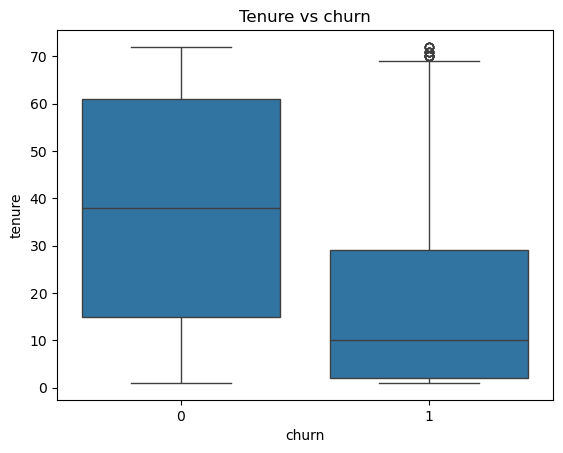

In [66]:
#Tenure vs churn
sns.boxplot(x="churn", y="tenure", data=df)
plt.title('Tenure vs churn')
plt.show()


In [49]:
# Tenure = Customer Lifetime
df.groupby("churn")["tenure"].mean()

churn
0    37.650010
1    17.979133
Name: tenure, dtype: float64

- churn = 1 → average lifetime before leaving

- churn = 0 → retained customers lifetime

# RETENTION ANALYSIS

In [ ]:
#Customer Lifetime Trend
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[0,6,12,24,48,72],
    labels=["0-6","6-12","12-24","24-48","48+"]
)


In [51]:
df.groupby("tenure_group")["churn"].mean()


C:\Users\Haha CORPORATION\AppData\Local\Temp\ipykernel_11164\1867558526.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")["churn"].mean()


tenure_group
0-6      0.533333
6-12     0.358865
12-24    0.287109
24-48    0.203890
48+      0.095132
Name: churn, dtype: float64

Highest churn occurs in the first 0–6 months

Churn probability drops sharply as tenure increases

### Insight:
Customer lifetime is highly dependent on early-stage experience. Retention failure happens early, not late.

# Retention Drivers (WHY churn happens)

In [ ]:
# Contract type =churn killer
df.groupby("contract")["churn"].mean()

contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: churn, dtype: float64

Month-to-month contracts show the highest churn

Two-year contracts show the lowest churn

### Insight:
Commitment length is the strongest churn reducer. Customers with long-term contracts are inherently more stable.

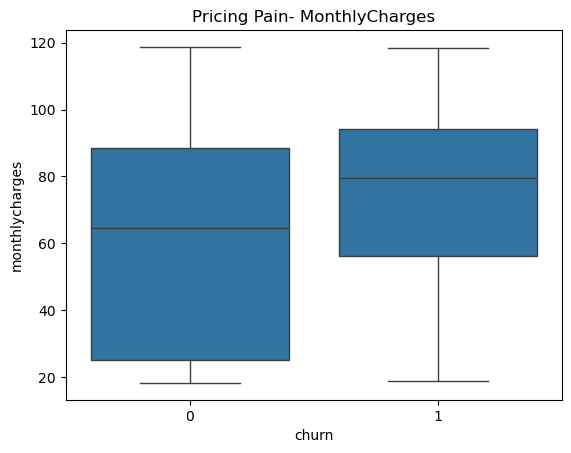

In [68]:
sns.boxplot(x="churn", y="monthlycharges", data=df)
plt.title('Pricing Pain- MonthlyCharges')
plt.show()


In [ ]:
# Pricing Pain
df.groupby("churn")["monthlycharges"].mean()


churn
0    61.307408
1    74.441332
Name: monthlycharges, dtype: float64

Churned customers have higher average MonthlyCharges

High charges combined with short tenure significantly increase churn risk

### Insight:
Price-value mismatch is a key churn trigger for new customers.

In [73]:
# Service-level churn drivers
service_cols = [
    "onlinesecurity", "techsupport",
    "deviceprotection", "onlinebackup"
]

for col in service_cols:
    print(col)
    print(df.groupby(col)["churn"].mean())
    print("------")



onlinesecurity
onlinesecurity
No                     0.417787
No internet service    0.074342
Yes                    0.146402
Name: churn, dtype: float64
------
techsupport
techsupport
No                     0.416475
No internet service    0.074342
Yes                    0.151961
Name: churn, dtype: float64
------
deviceprotection
deviceprotection
No                     0.391403
No internet service    0.074342
Yes                    0.225393
Name: churn, dtype: float64
------
onlinebackup
onlinebackup
No                     0.399417
No internet service    0.074342
Yes                    0.215670
Name: churn, dtype: float64
------


- Customers without security or support churn more

- “No internet service” behaves differently

## Customer Lifetime Metric 

In [ ]:
## customer lifetime trend
df["estimated_clv"] = df["monthlycharges"] * df["tenure"]
df.groupby("churn")["estimated_clv"].mean()

churn
0    2555.203283
1    1531.608828
Name: estimated_clv, dtype: float64

## Visuals

<Axes: xlabel='tenure_group', ylabel='churn'>

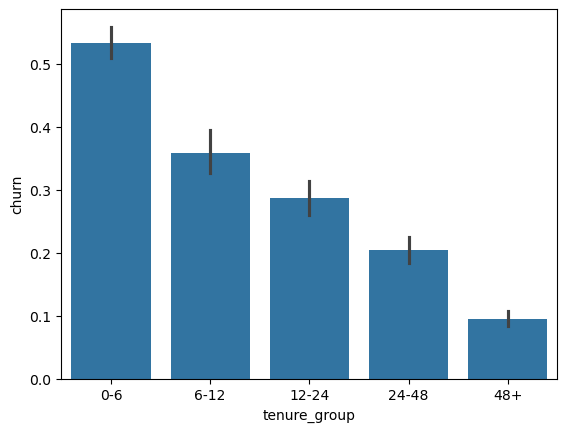

In [64]:
import seaborn as sns
sns.barplot(x="tenure_group", y="churn", data=df)


### Overall Churn Overview

The dataset shows a significant churn rate, indicating a clear retention challenge. This churn is not random and is concentrated within specific customer segments, particularly during early stages of the customer lifecycle.

###  Customer Lifetime & Retention Trends
 Tenure-Based Churn Analysis

Customers with tenure less than 6 months show the highest churn rates

Churn probability decreases sharply as tenure increases

Long-tenure customers demonstrate strong retention stability

Insight:
Churn is primarily an early-lifecycle problem, highlighting weak onboarding and early engagement.

### . Key Retention Drivers (Why Customers Churn)
- Contract Type

Month-to-month contracts exhibit the highest churn

Long-term contracts (1–2 years) significantly reduce churn risk

Interpretation:
Lower commitment leads to higher churn.

- Pricing Pressure

Churned customers have higher average MonthlyCharges

Price sensitivity is most severe among low-tenure users

Interpretation:
High cost without perceived value accelerates early churn.

- Value-Added Services

Customers lacking the following services show higher churn:

TechSupport

OnlineSecurity

Interpretation:
Support and security services increase perceived value and customer stickiness.

- Payment Method

Customers using Electronic Check experience higher churn

Auto-pay methods (credit card, bank transfer) show better retention

Interpretation:
Manual payments introduce friction and reflect lower commitment.

### High-Risk Customer Profile

A typical high-risk churn customer:

Has tenure < 6 months

Is on a month-to-month contract

Pays higher MonthlyCharges

Lacks TechSupport and OnlineSecurity

Uses Electronic Check as payment method

This profile enables targeted retention actions instead of ineffective blanket discounts.

### Customer Lifetime Value (CLV) Insight

Estimated CLV was calculated using:

Estimated CLV = MonthlyCharges × Tenure


Retained customers generate significantly higher lifetime value

Early churn directly results in lost long-term revenue

Insight:
Retention improvements directly translate into revenue growth.

### Actionable Business Recommendations
 Retention Strategies
1. Early-Stage Retention Focus

Proactively engage customers within the first 6 months

Strengthen onboarding, early education, and support touchpoints

2. Contract Conversion Incentives

Offer limited-time incentives to shift customers from month-to-month to long-term contracts

Increase commitment and reduce churn probability

3. Service Bundling Strategy

Bundle TechSupport and OnlineSecurity for new or high-risk customers

Increase perceived value and reduce churn

4. Price Sensitivity Management

Identify high-charge, low-tenure customers

Offer targeted retention pricing instead of global discounts

5. Payment Method Optimization

Encourage auto-pay adoption via incentives

Reduce payment friction and improve retention stability

Each recommendation is directly tied to observed churn drivers.

10. Conclusion

This analysis reveals that customer churn is driven primarily by early tenure, low contractual commitment, pricing pressure, lack of support services, and payment friction. By focusing on early-stage retention, value reinforcement, and commitment-building strategies, the business can significantly reduce churn while increasing customer lifetime value.